# Project

## Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Guo Xiang/OneDrive/Desktop/Healthcare/pima-indians-diabetes.csv", header=None) #import dataset

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
with open("C:/Users/Guo Xiang/OneDrive/Desktop/Healthcare/pima-indians-diabetes.names.txt", "r") as f:  #import data description as text
    print(f.read())

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patien

In [6]:
#Add colmun headers to all headers in dataset
df.columns = ['No. of times Pregnant', 'Plasma glucose concentration', 'Diastolic(BP)', 'Triceps Skin fold thickness', 
              '2-hour serum insulin', 'BMI', 'Diabetes pedigree function', 'Age', 'Diabetes(Y/N)']  

## Explatory Data Analysis

In [6]:
#observe the type of data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No. of times Pregnant         768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic(BP)                 768 non-null    int64  
 3   Triceps Skin fold thickness   768 non-null    int64  
 4   2-hour serum insulin          768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Diabetes(Y/N)                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#observe spread of data
df.describe()

,No. of times Pregnant,Plasma glucose concentration,Diastolic(BP),Triceps Skin fold thickness,2-hour serum insulin,BMI,Diabetes pedigree function,Age,Diabetes(Y/N)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Initially, check null vales
df.isnull().sum()

No. of times Pregnant           0
Plasma glucose concentration    0
Diastolic(BP)                   0
Triceps Skin fold thickness     0
2-hour serum insulin            0
BMI                             0
Diabetes pedigree function      0
Age                             0
Diabetes(Y/N)                   0
dtype: int64

In [8]:
df.duplicated().sum() # check for any duplicates in entries

0

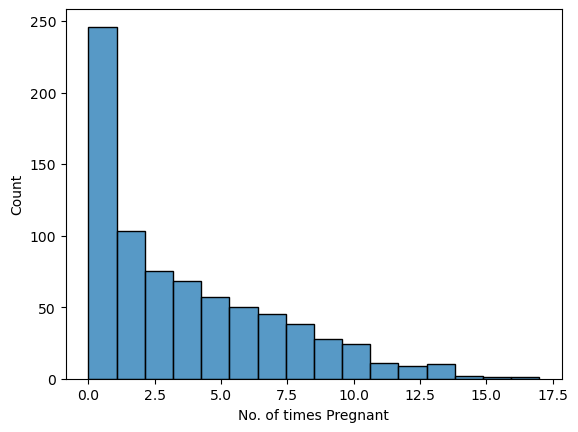

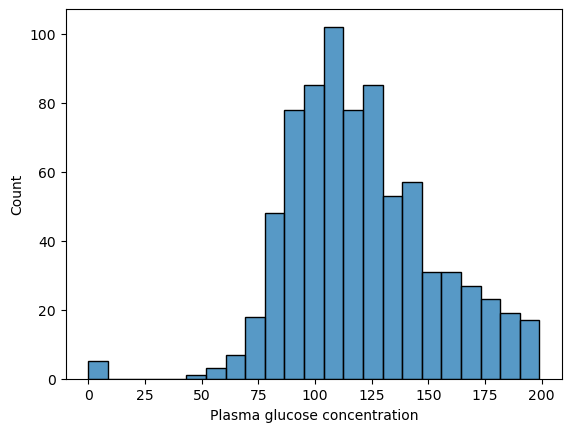

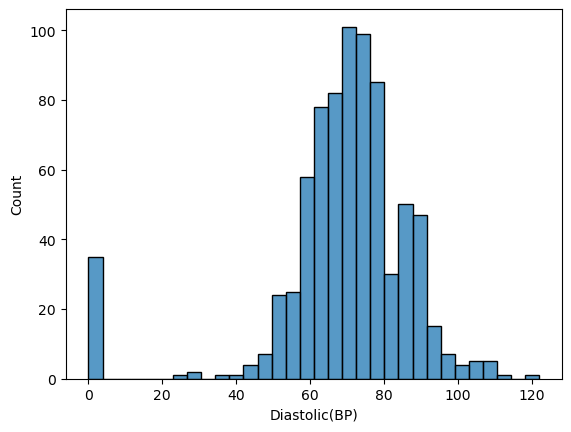

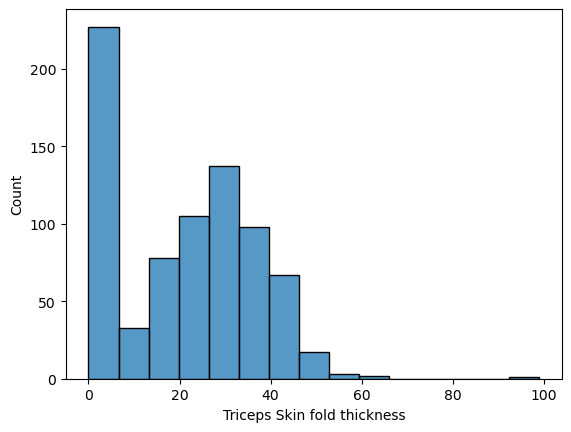

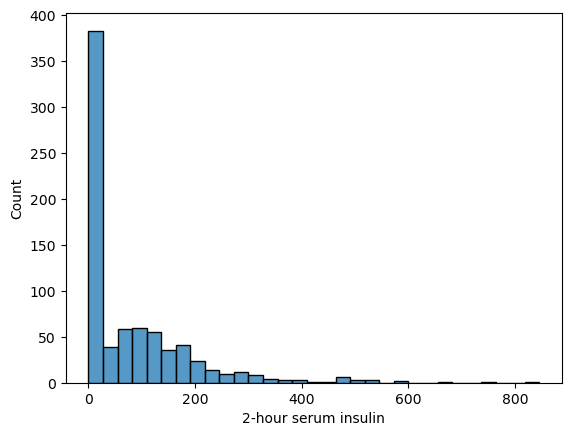

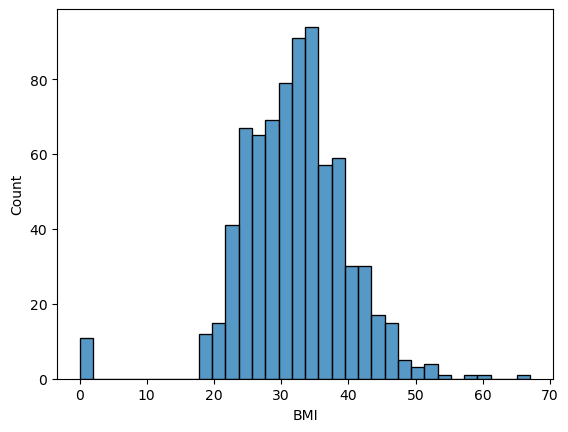

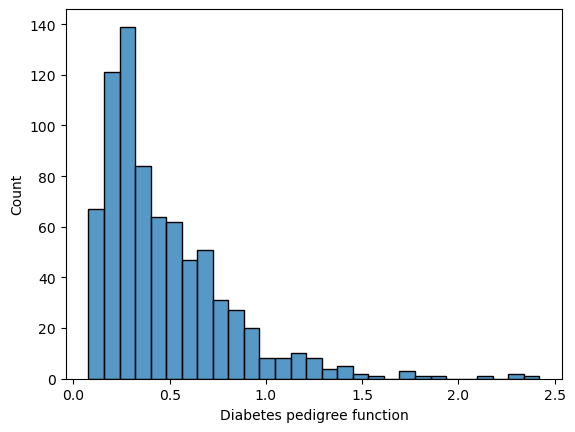

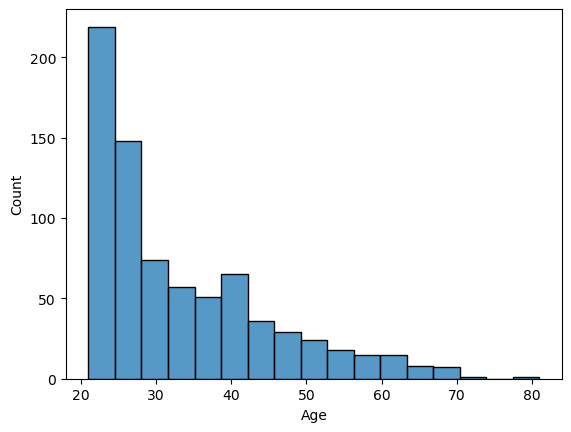

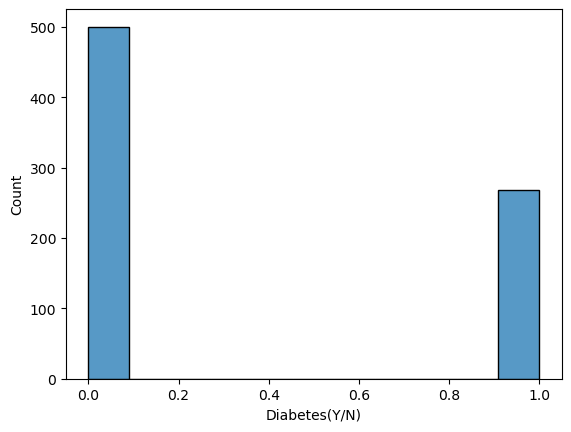

In [9]:
for i in df:                       #Indivdiual histogram to show spread of each data
    sns.histplot(data=df, x=i)
    plt.show()

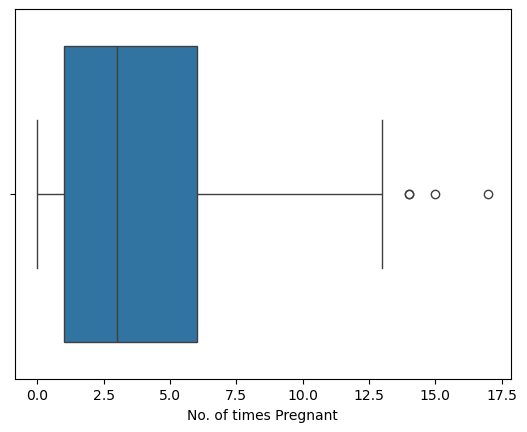

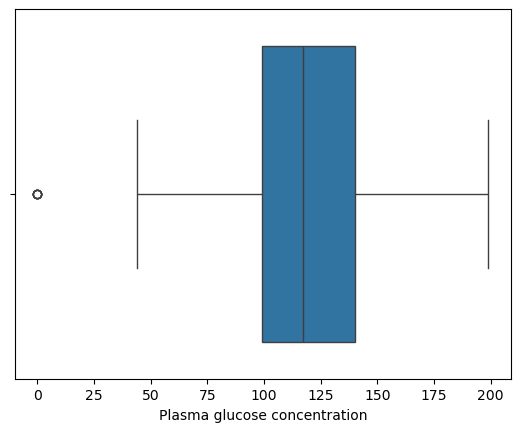

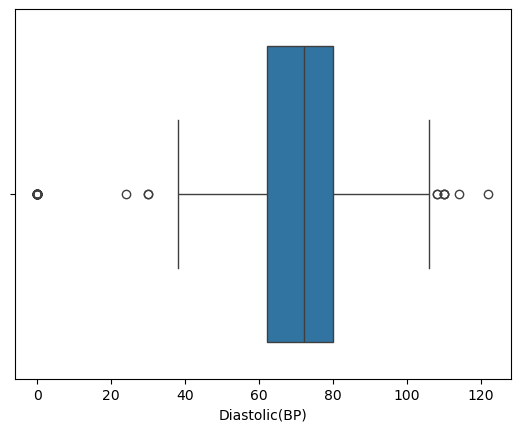

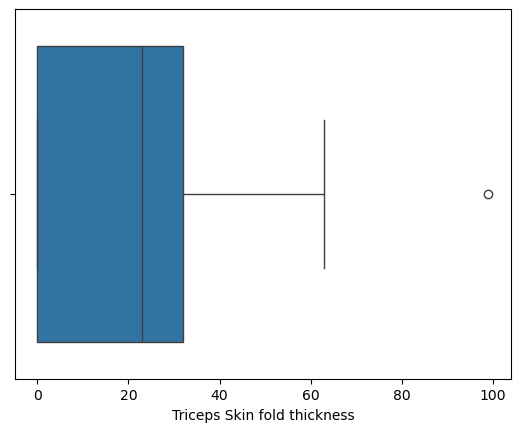

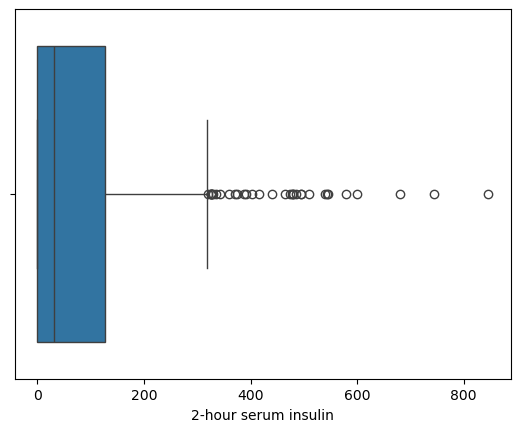

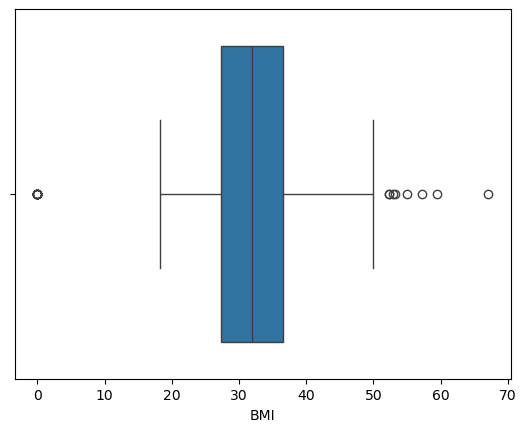

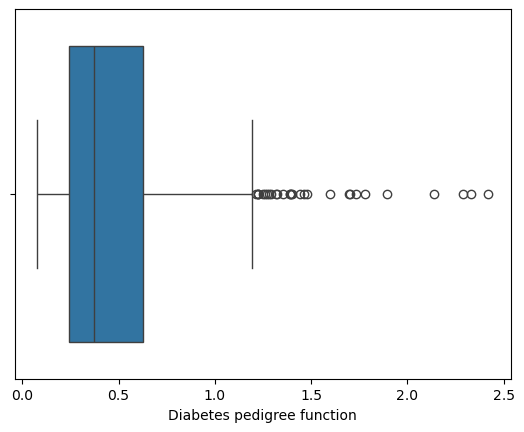

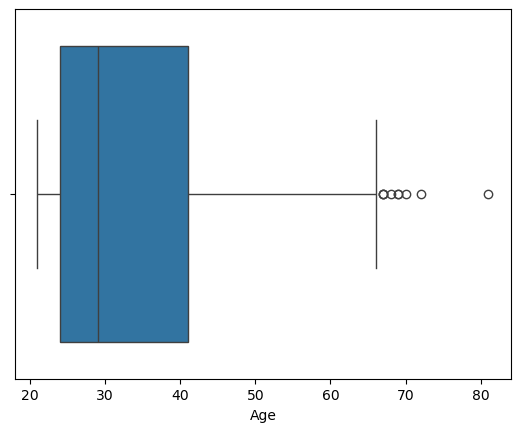

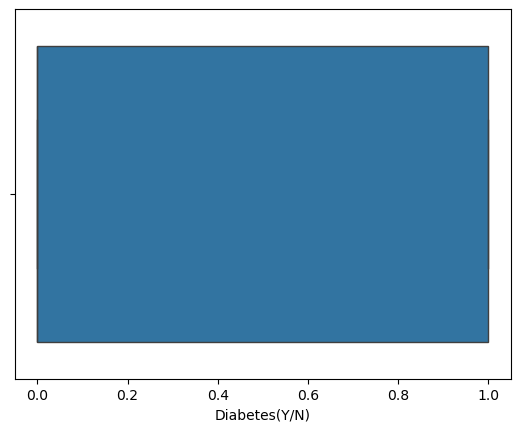

In [10]:
for i in df:                   #Individual box plot to show spread of data
    sns.boxplot(data=df, x=i)
    plt.show()

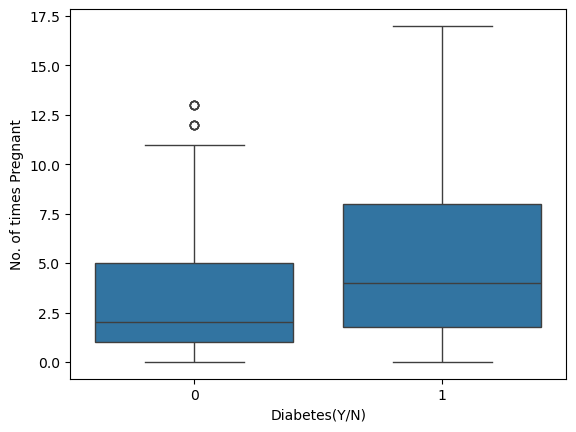

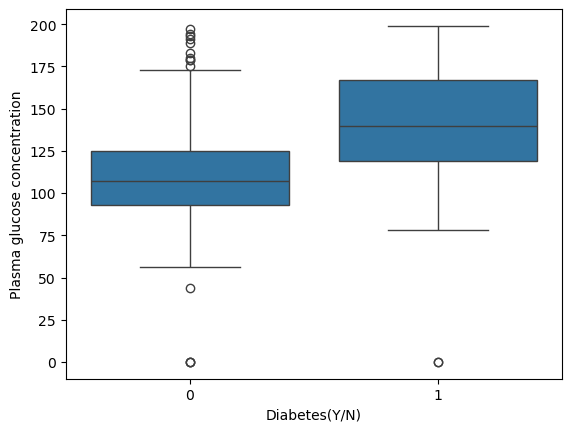

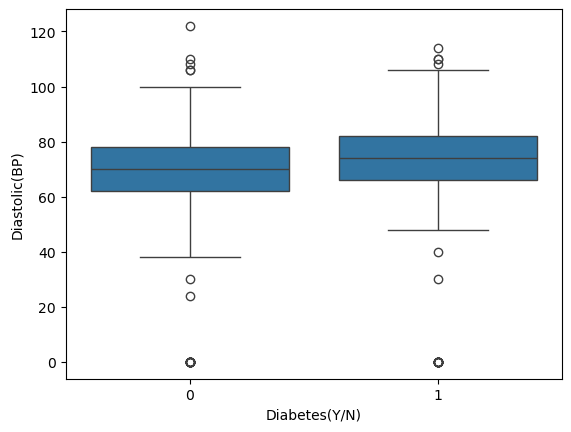

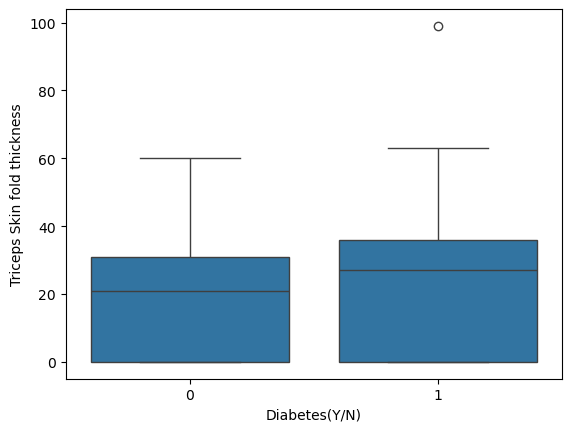

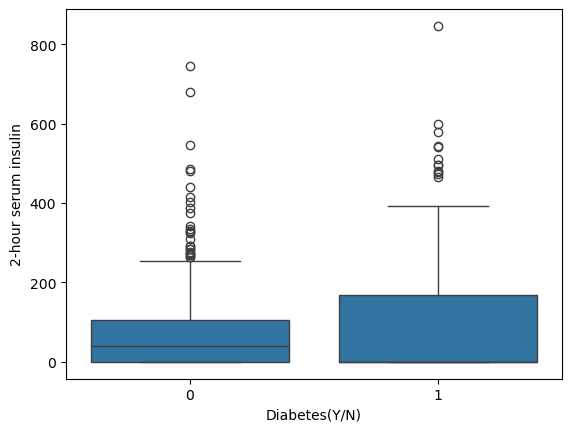

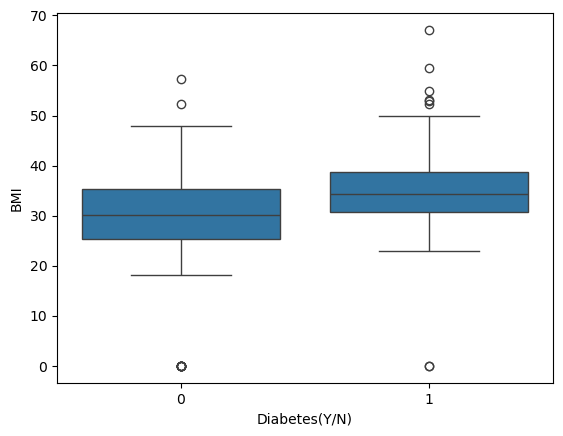

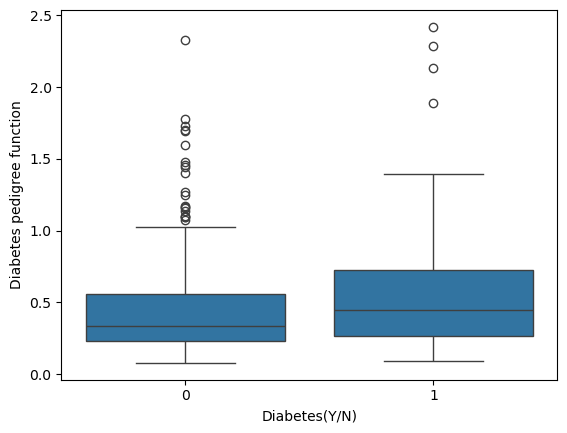

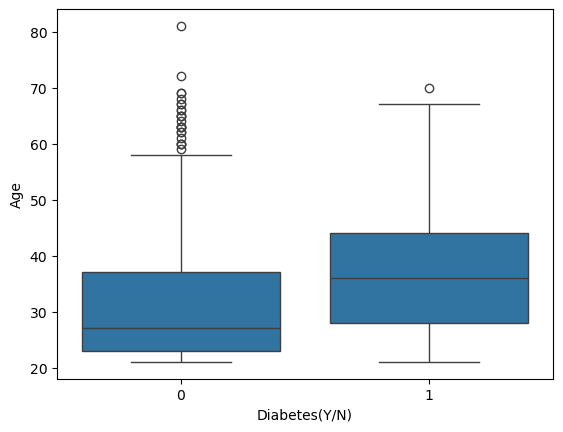

In [11]:
#Box plot of each feature against target data to seek out relationships
for i in ['No. of times Pregnant', 'Plasma glucose concentration', 'Diastolic(BP)', 'Triceps Skin fold thickness', 
              '2-hour serum insulin', 'BMI', 'Diabetes pedigree function', 'Age']:  
    sns.boxplot(x= 'Diabetes(Y/N)', y=i, data=df)
    plt.show()



<Axes: >

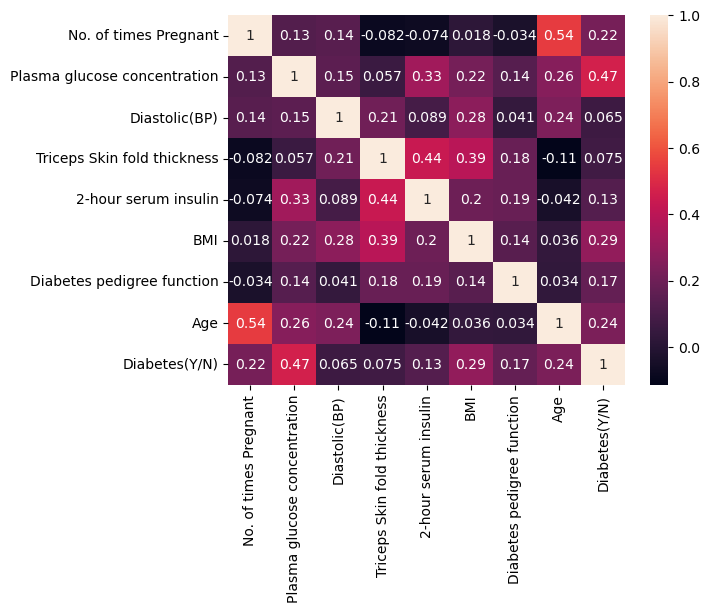

In [12]:
#Correlation map to seek out relationships between each features and target data
s = df.corr()
sns.heatmap(s, annot=True)  #Diabetes have a somewhat correlation with plasma glucose concentration

## Null Value Treatment

In [13]:
#Initially, check null vales
df.isnull().sum()

No. of times Pregnant           0
Plasma glucose concentration    0
Diastolic(BP)                   0
Triceps Skin fold thickness     0
2-hour serum insulin            0
BMI                             0
Diabetes pedigree function      0
Age                             0
Diabetes(Y/N)                   0
dtype: int64

In [14]:
#Realize there are a lot of 0s in dataset
#Columns that are allowed to have 0:
#No. of times Pregnant
#Diabetes pedigree function
#Diabetes(Y/N)


In [15]:
df.columns

Index(['No. of times Pregnant', 'Plasma glucose concentration',
       'Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Diabetes(Y/N)'],
      dtype='object')

In [16]:
for i in ['Plasma glucose concentration',
       'Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin',
       'BMI', 'Age','Diabetes pedigree function']:
    df[i] = df[i].replace(0, np.nan)

In [17]:
df.isnull().sum()

No. of times Pregnant             0
Plasma glucose concentration      5
Diastolic(BP)                    35
Triceps Skin fold thickness     227
2-hour serum insulin            374
BMI                              11
Diabetes pedigree function        0
Age                               0
Diabetes(Y/N)                     0
dtype: int64

In [18]:
#Import imputer from sklearn. Use mean instead of median as most of the data that ened treating is evenly distributed according to histogram
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(strategy='mean')

In [19]:
#Those are in float is because precision matters, while those in integers is because float don't make sense
for i in ['Plasma glucose concentration',
       'Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin',
       'BMI',]:
    df[i] = impute_mean.fit_transform(df[[i]]).round(1)
    if i in ['Diastolic(BP)', 'Triceps Skin fold thickness']:
        df[i] = df[i].astype(int)

In [20]:
df.isnull().sum()

No. of times Pregnant           0
Plasma glucose concentration    0
Diastolic(BP)                   0
Triceps Skin fold thickness     0
2-hour serum insulin            0
BMI                             0
Diabetes pedigree function      0
Age                             0
Diabetes(Y/N)                   0
dtype: int64

## Outlier treatment

In [21]:
#Re-check after null values trated
df.describe()

,No. of times Pregnant,Plasma glucose concentration,Diastolic(BP),Triceps Skin fold thickness,2-hour serum insulin,BMI,Diabetes pedigree function,Age,Diabetes(Y/N)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686849,72.386719,29.108073,155.524740,32.458073,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096642,8.791221,85.021111,6.875153,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


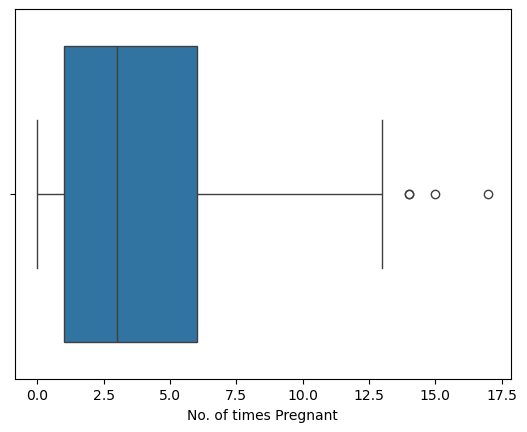

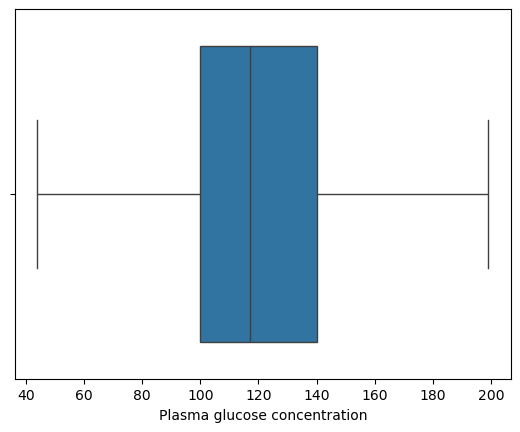

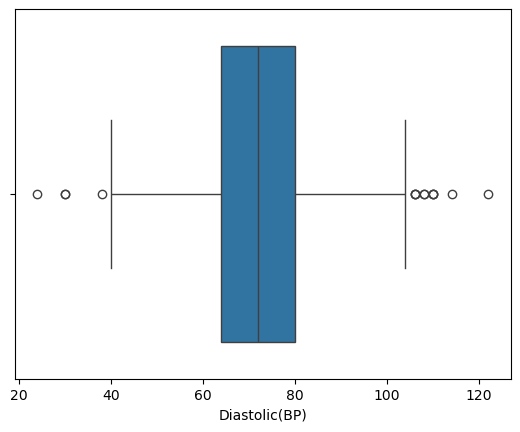

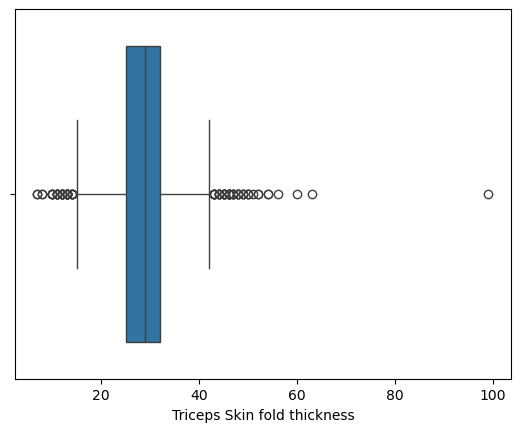

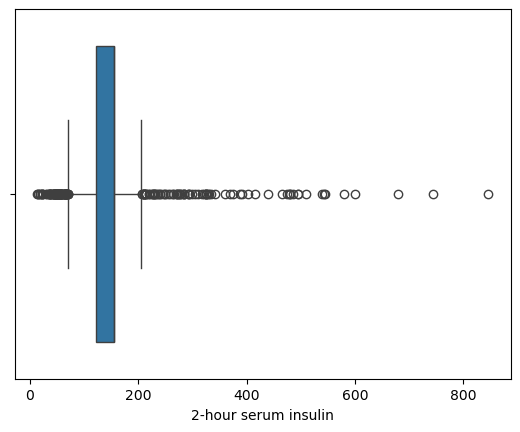

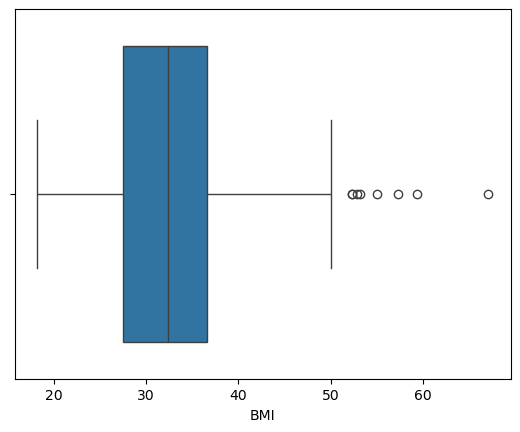

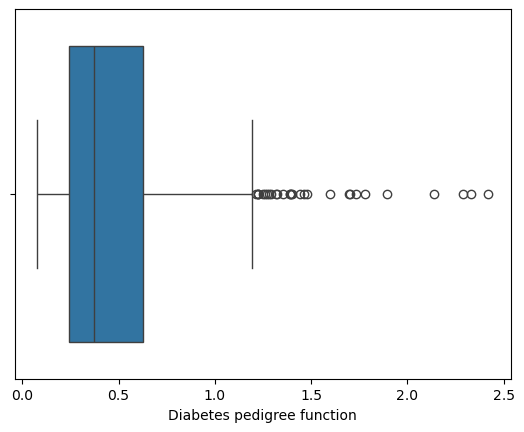

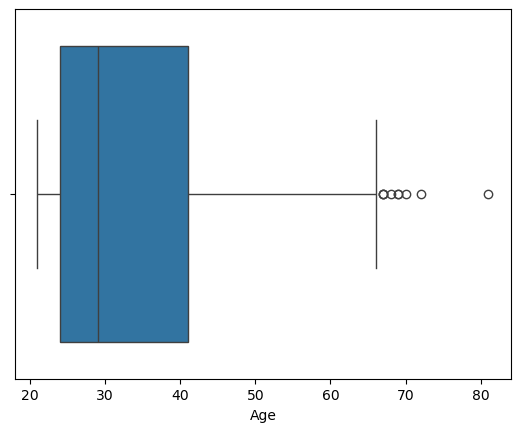

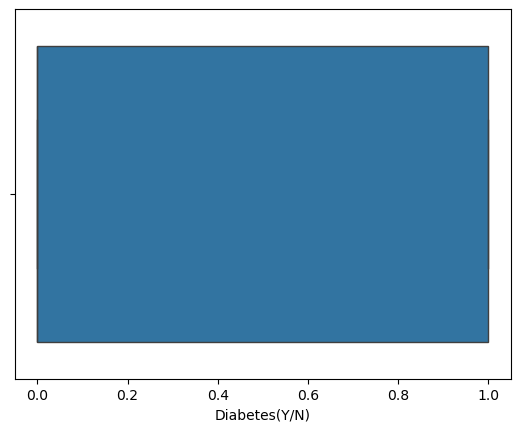

In [22]:
#Re-check after null values are treated
for i in df:
    sns.boxplot(data=df, x=i)
    plt.show()

Identified 3 features with outliers that do not make sense
Diastolic(BP): too low 
Tricep skin fold thickness: both too low and too high
2-hour serum insulin: too high


In [23]:
#Create function to get lower whisker and upper whisker
def whisker(col):                               
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw, uw

In [25]:
#Fix too low - Diastolic(BP)
for i in ['Diastolic(BP)']:  
    lw,uw = whisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])

In [26]:
#Fix too low and too high - Triceps Skin fold thickness
for i in ['Triceps Skin fold thickness']:  
    lw,uw = whisker(df[i])
    df[i] = np.where(df[i]<lw,lw,df[i])
    df[i] = np.where(df[i]>uw,uw,df[i])

In [27]:
#Fix too high - 2-hour serum insulin
for i in ['2-hour serum insulin']:  
    lw,uw = whisker(df[i])
    df[i] = np.where(df[i]>uw,uw,df[i])

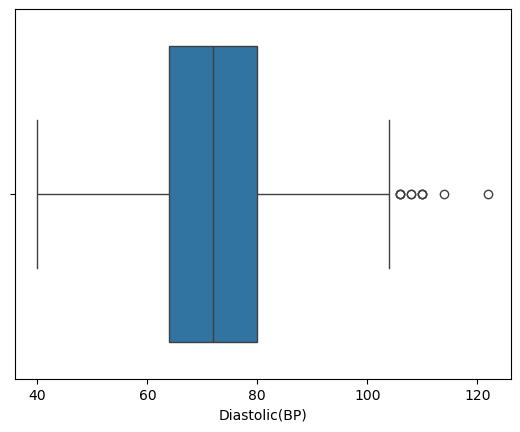

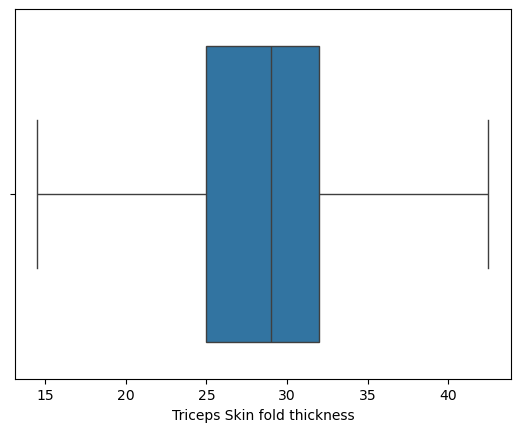

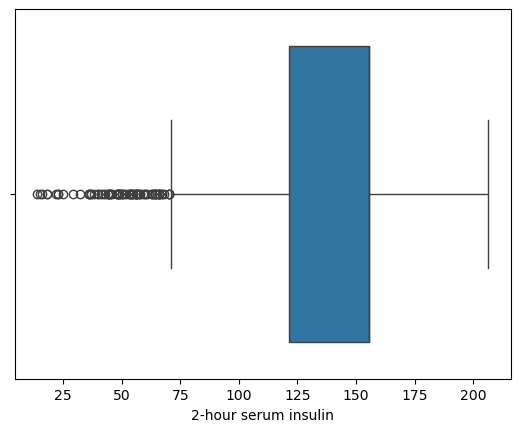

In [28]:
for i in ['Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin']:
    sns.boxplot(data=df, x=i)
    plt.show()

## Normalization

In [29]:
df.columns

Index(['No. of times Pregnant', 'Plasma glucose concentration',
       'Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Diabetes(Y/N)'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = ['No. of times Pregnant', 'Plasma glucose concentration',
       'Diastolic(BP)', 'Triceps Skin fold thickness', '2-hour serum insulin',
       'BMI', 'Diabetes pedigree function', 'Age',]
target = 'Diabetes(Y/N)'

scaled_features = scaler.fit_transform(df[features]) #Convert dataset to numpy array and transform the dataset by normalization
scaled_features_df = pd.DataFrame(scaled_features, columns=features) #Convert the numpy array back to pandas dataframe
df_scaled = pd.concat([scaled_features_df, df[target].reset_index(drop=True)], axis=1) # Combine the edited features and target together


## Final Data

In [31]:
df_scaled.to_csv("C:/Users/Guo Xiang/OneDrive/Desktop/Healthcare/pima-indians-diabetes(edited).csv", index=False)